In [1]:
!pip install ipywidgets

Composite Environmental Impact Scores for Each Diet Type:
  diet_group  composite_score
0      vegan         0.000000
1     veggie         0.212593
2       fish         0.280942
3     meat50         0.292246
4       meat         0.490518
5    meat100         1.000000


interactive(children=(Dropdown(description='selected_diet', options=('vegan', 'veggie', 'fish', 'meat50', 'mea…

<Figure size 864x432 with 0 Axes>

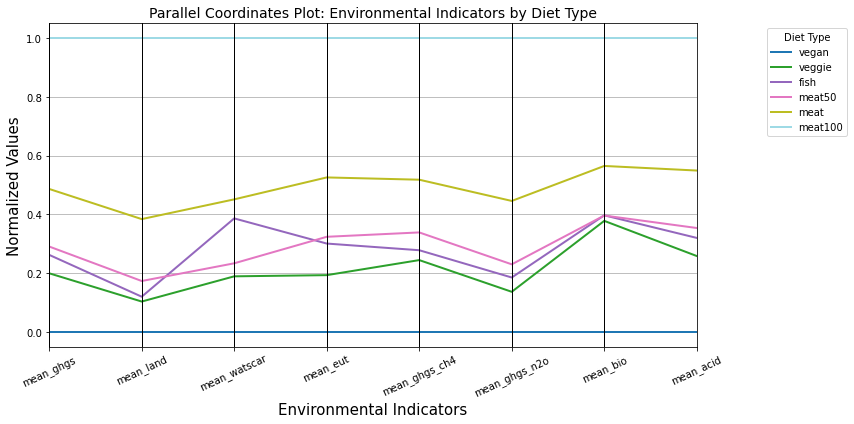

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler
import ipywidgets as widgets
from ipywidgets import interact

file_path = "Results_21MAR2022_nokcaladjust.csv"
df = pd.read_csv(file_path)

# Select
selected_columns = [
    "diet_group", "mean_ghgs", "mean_land", "mean_watscar", 
    "mean_eut", "mean_ghgs_ch4", "mean_ghgs_n2o", "mean_bio", "mean_acid"
]
df_selected = df[selected_columns]

df_grouped = df_selected.groupby("diet_group").mean().reset_index()

env_columns = [
    "mean_ghgs", "mean_land", "mean_watscar", 
    "mean_eut", "mean_ghgs_ch4", "mean_ghgs_n2o", "mean_bio", "mean_acid"
]
scaler = MinMaxScaler()
df_grouped[env_columns] = scaler.fit_transform(df_grouped[env_columns])

df_grouped['composite_score'] = df_grouped[env_columns].mean(axis=1)

df_grouped = df_grouped.sort_values(by='composite_score').reset_index(drop=True)

print("Composite Environmental Impact Scores for Each Diet Type:")
print(df_grouped[["diet_group", "composite_score"]])


num_vars = len(env_columns)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

def plot_radar(selected_diet):
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'polar': True})
    for _, row in df_grouped.iterrows():
        values = row[env_columns].tolist()
        values += values[:1]
        if row["diet_group"] == selected_diet:
            # Highlight the selected diet type: thicker line and higher opacity
            ax.plot(angles, values, label=row["diet_group"], linewidth=4, marker='o')
            ax.fill(angles, values, alpha=0.4)
        else:
            # Display other diet types in gray with thinner lines
            ax.plot(angles, values, label=row["diet_group"], color='gray', linewidth=1, alpha=0.3)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(env_columns, fontsize=10)
    ax.set_title("Interactive Radar Chart: Highlighting " + selected_diet, fontsize=14)
    ax.legend(loc="upper right", bbox_to_anchor=(1.1, 1.1))
    plt.show()


interact(plot_radar, selected_diet=df_grouped['diet_group'].unique().tolist());


plt.figure(figsize=(12, 6))

from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
from matplotlib import cm

plt.figure(figsize=(12, 6))

diet_colors = cm.get_cmap('tab20', len(df_grouped['diet_group'].unique()))

parallel_coordinates(df_grouped, class_column="diet_group", cols=env_columns, 
                     colormap=diet_colors, linewidth=2)

plt.title("Parallel Coordinates Plot: Environmental Indicators by Diet Type", fontsize=14)
plt.xticks(rotation=25)
plt.xlabel("Environmental Indicators", fontsize=15)
plt.ylabel("Normalized Values", fontsize=15)
plt.grid(True)

plt.legend(title="Diet Type", bbox_to_anchor=(1.1, 1), loc='upper left')

plt.tight_layout()

plt.show()